In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

# Preparation

## Load Data

### Essen Folksong Collection

Contains 9000+ melodies as lists of intervals and lists of pitches.

In [2]:
# read data

data_essen = pd.read_csv('Essen_folksong_collection.csv', index_col=0, sep='\t')

data_essen.head()

,region,title,key,DGIs,spelled_pitches
0,africa,Muwaschah Lamma Bada,g minor,"['P4', 'M2', 'm2', 'M2', 'M-2', 'P1', 'm-2', '...","['D5', 'G5', 'A5', 'B-5', 'C6', 'B-5', 'B-5', ..."
1,mexico,CUCA 1,F major,"['P1', 'P1', 'P4', 'M3', 'M-6', 'P1', 'P1', 'P...","['C4', 'C4', 'C4', 'F4', 'A4', 'C4', 'C4', 'C4..."
2,mexico,CUCA 2,F major,"['P1', 'P1', 'P4', 'M3', 'M-6', 'P1', 'P1', 'P...","['C4', 'C4', 'C4', 'F4', 'A4', 'C4', 'C4', 'C4..."
3,mexico,CUCA 1,F major,"['P1', 'P1', 'P4', 'M3', 'M-6', 'P1', 'P1', 'P...","['C4', 'C4', 'C4', 'F4', 'A4', 'C4', 'C4', 'C4..."
4,mexico,CUCA 2,F major,"['P1', 'P1', 'P4', 'M3', 'M-6', 'P1', 'P1', 'P...","['C4', 'C4', 'C4', 'F4', 'A4', 'C4', 'C4', 'C4..."


In [3]:
# split and strip intervals

sequences_essen_int = [
    [ interval.strip( '\"[\',\]' ) for interval in row.DGIs.split() ] 
    for (i, row) in data_essen.iterrows()
]

sequences_essen_int[0]

['P4',
 'M2',
 'm2',
 'M2',
 'M-2',
 'P1',
 'm-2',
 'P1',
 'M-2',
 'P1',
 'm-2',
 'm2',
 'M2',
 'm2',
 'M2',
 'M2',
 'M-3',
 'm-2',
 'P1',
 'M-2',
 'P1',
 'm-2',
 'm2',
 'M2',
 'M-2',
 'm-2',
 'm2',
 'M-3',
 'm-2',
 'm2',
 'm-2',
 'm2',
 'A2',
 'M-3',
 'm2',
 'm-2',
 'M-2',
 'M2',
 'M-3',
 'm-2',
 'P1',
 'P1',
 'M-2',
 'P1',
 'm-2',
 'm2',
 'P5',
 'P4',
 'M2',
 'm2',
 'M2',
 'M-2',
 'P1',
 'm-2',
 'P1',
 'M-2',
 'P1',
 'm-2',
 'm2',
 'P-4',
 'P4',
 'M2',
 'm2',
 'P1',
 'm-2',
 'm3',
 'M-2',
 'm-3',
 'P5',
 'M-2',
 'P1',
 'M-2',
 'P1',
 'm-2',
 'P1',
 'M-2',
 'P1',
 'M-2',
 'M2',
 'M2',
 'm2',
 'P-4',
 'M2',
 'M2',
 'm2',
 'P1',
 'm-2',
 'm3',
 'M-2',
 'm-2',
 'm2',
 'M2',
 'M2',
 'M-3',
 'm-2',
 'P1',
 'M-2',
 'P1',
 'm-2',
 'm2',
 'M2',
 'M-2',
 'm-2',
 'm2',
 'm-2',
 'M-2',
 'd1',
 'm-2',
 'm2',
 'm-2',
 'm2',
 'A2',
 'M-3',
 'm2',
 'm-2',
 'M-2',
 'M2',
 'M-3',
 'm-2',
 'P1',
 'M-2',
 'P1',
 'm-2',
 'm2',
 'M2',
 'm2',
 'M2',
 'M2',
 'M-3',
 'm-2',
 'P1',
 'M-2',
 'P1',
 'm-2',
 'm2

In [4]:
# split and strip pitches

sequences_essen_pitch = [
    [ pitch.strip( '\"[\',\]' ) for pitch in row.spelled_pitches.split() ] 
    for (i, row) in data_essen.iterrows()
]

sequences_essen_pitch[0]

['D5',
 'G5',
 'A5',
 'B-5',
 'C6',
 'B-5',
 'B-5',
 'A5',
 'A5',
 'G5',
 'G5',
 'F#5',
 'G5',
 'A5',
 'B-5',
 'C6',
 'D6',
 'B-5',
 'A5',
 'A5',
 'G5',
 'G5',
 'F#5',
 'G5',
 'A5',
 'G5',
 'F#5',
 'G5',
 'E-5',
 'D5',
 'E-5',
 'D5',
 'E-5',
 'F#5',
 'D5',
 'E-5',
 'D5',
 'C5',
 'D5',
 'B-4',
 'A4',
 'A4',
 'A4',
 'G4',
 'G4',
 'F#4',
 'G4',
 'D5',
 'G5',
 'A5',
 'B-5',
 'C6',
 'B-5',
 'B-5',
 'A5',
 'A5',
 'G5',
 'G5',
 'F#5',
 'G5',
 'D5',
 'G5',
 'A5',
 'B-5',
 'B-5',
 'A5',
 'C6',
 'B-5',
 'G5',
 'D6',
 'C6',
 'C6',
 'B-5',
 'B-5',
 'A5',
 'A5',
 'G5',
 'G5',
 'F5',
 'G5',
 'A5',
 'B-5',
 'F5',
 'G5',
 'A5',
 'B-5',
 'B-5',
 'A5',
 'C6',
 'B-5',
 'A5',
 'B-5',
 'C6',
 'D6',
 'B-5',
 'A5',
 'A5',
 'G5',
 'G5',
 'F#5',
 'G5',
 'A5',
 'G5',
 'F#5',
 'G5',
 'F#5',
 'E5',
 'E-5',
 'D5',
 'E-5',
 'D5',
 'E-5',
 'F#5',
 'D5',
 'E-5',
 'D5',
 'C5',
 'D5',
 'B-4',
 'A4',
 'A4',
 'G4',
 'G4',
 'F#4',
 'G4',
 'A4',
 'B-4',
 'C5',
 'D5',
 'B-4',
 'A4',
 'A4',
 'G4',
 'G4',
 'F#4']

In [5]:
# convert intervals into interval classes

int_class = {
    'A-11':6,
     'A-2':-3,
     'A-3':-5,
     'A-4':-6,
     'A-5':-8,
     'A-8':-1,
     'A1':1,
     'A2':3,
     'A3':4,
     'A4':6,
     'A5':8,
     'A8':1,
     'M-10':-4,
     'M-13':-9,
     'M-16':-2,
     'M-2':-2,
     'M-3':-4,
     'M-6':-9,
     'M-7':-11,
     'M-9':-2,
     'M10':4,
     'M13':7,
     'M2':2,
     'M3':4,
     'M6':8,
     'M7':11,
     'M9':2,
     'P-11':-5,
     'P-12':-7,
     'P-15':0,
     'P-4':-5,
     'P-5':-7,
     'P-8':0,
     'P1':0,
     'P11':5,
     'P12':7,
     'P15':0,
     'P4':5,
     'P5':7,
     'P8':0,
     'd-3':-2,
     'd-4':-4,
     'd-5':-6,
     'd-7':-9,
     'd1':-1,
     'd3':2,
     'd4':4,
     'd5':6,
     'd6':7,
     'd7':9,
     'm-10':-4,
     'm-13':-9,
     'm-2':-1,
     'm-3':-3,
     'm-6':-8,
     'm-7':-10,
     'm-9':-1,
     'm10':-3,
     'm13':8,
     'm2':1,
     'm3':3,
     'm6':8,
     'm7':10,
     'm9':1,
}

def to_int_class(interval):
    return int_class[interval]

# Exercise: Markov Models

For the following exercise use either the pitch sequences or the interval sequences.

1. Compute bigrams, count their occurrences, and look at the top 20 bigrams.
1. Plot a heatmap of all bigrams.
1. Use the sequences to train a 1st-order markov model.
1. Use the model to generate new sequences of length 100.

## 1. Computing Bigrams

In [6]:
# Compute bigrams

def bigrams_seq(seq):
    return list(zip(seq[:-1], seq[1:]))

def bigrams_corpus(seqs):
    return [bg for seq in seqs for bg in bigrams_seq(seq)]

bigrams = bigrams_corpus(sequences_essen_int)
bg_counts = Counter(bigrams)
bg_counts.most_common(20)

[(('P1', 'P1'), 25227),
 (('M-2', 'M-2'), 21822),
 (('M2', 'M-2'), 17255),
 (('M-2', 'M2'), 16583),
 (('P1', 'M-2'), 15846),
 (('M-2', 'P1'), 15804),
 (('M-2', 'm-2'), 13594),
 (('m-2', 'M-2'), 13331),
 (('P1', 'M2'), 12635),
 (('m-3', 'M-2'), 12257),
 (('M2', 'M2'), 11690),
 (('M-2', 'm-3'), 11281),
 (('M2', 'P1'), 9277),
 (('m-3', 'm3'), 7766),
 (('M2', 'm2'), 7691),
 (('m2', 'M2'), 7222),
 (('M2', 'm3'), 6733),
 (('m3', 'm-3'), 6718),
 (('m3', 'P1'), 6253),
 (('P1', 'm-3'), 6158)]

## 2. Plotting Bigrams

In [7]:
x1s    = [ x1  for ((x1, x2), count) in bg_counts.items() ]
x2s    = [ x2  for ((x1, x2), count) in bg_counts.items() ]
counts = [ count for ((x1, x2), count) in bg_counts.items() ]

df = pd.DataFrame({"x1": map(to_int_class, x1s), "x2": map(to_int_class, x2s), "counts": counts})
df.head()

df_wide = df.pivot_table(index=["x1"], columns="x2", values="counts").fillna(0)
df_wide.head()

x2,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,...,2,3,4,5,6,7,8,9,10,11
x1,,,,,,,,,,,,,,,,,,,,,
-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,0.0,3.000000,0.0,0.0,19.000000,7.000000,0.0,0.0,1.0
-10,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,2.0,65.0,...,29.000000,327.0,78.000000,39.0,1.0,37.000000,17.500000,0.0,48.0,0.0
-9,0.0,1.0,0.0,0.0,6.0,0.0,3.0,0.0,91.0,14.0,...,98.333333,44.0,31.333333,336.0,2.0,28.333333,126.000000,0.0,28.0,1.0
-8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,1.0,419.0,...,38.000000,747.0,1.000000,79.5,2.0,5.000000,57.000000,0.0,8.0,0.0
-7,0.0,0.0,2.0,3.0,9.5,0.0,60.0,2.0,94.5,108.0,...,277.250000,247.5,132.600000,243.0,5.0,90.200000,82.666667,0.0,51.5,10.0


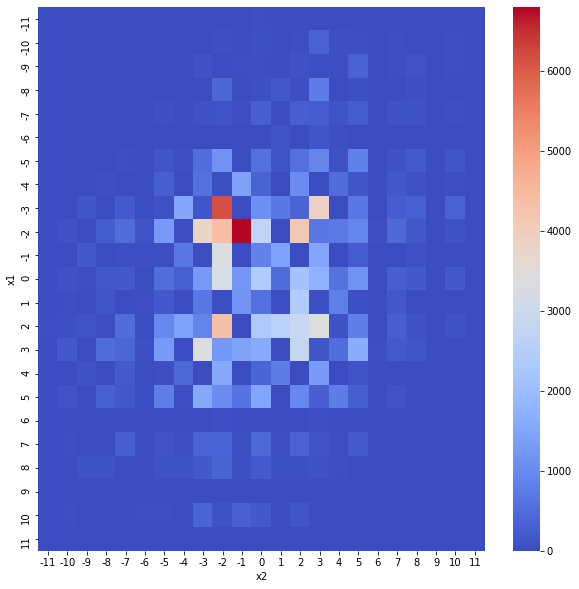

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df_wide, cmap="coolwarm")

## 3. Train a Markov Model

In [9]:
# Compute transition table

transitions = dict()
for ((x1, x2), count) in bg_counts.items():
    if not (x1 in transitions):
        transitions[x1] = dict()
    transitions[x1][x2] = count

In [10]:
def normalize_dict(dictionary):
    S = sum(dictionary.values())
    return dict([(k, v/S) for (k, v) in dictionary.items()])

In [11]:
transitions_norm = dict([(x1, normalize_dict(counts)) for (x1, counts) in transitions.items()])

In [12]:
transitions_norm

{'P4': {'M2': 0.12310110005238345,
  'M3': 0.06526104417670683,
  'P1': 0.2534922297887201,
  'P-4': 0.10184215121354985,
  'm-2': 0.08176182992840929,
  'M-2': 0.13606600314300682,
  'P-5': 0.02361620394621966,
  'M-6': 0.0016588091496420464,
  'm-3': 0.13606600314300682,
  'P-8': 0.005893137768465165,
  'P4': 0.011611664047494325,
  'm-7': 0.0054566090448751525,
  'm-6': 0.027370350969093765,
  'A1': 0.00013095861707700367,
  'P5': 0.005107386066003143,
  'm3': 0.012310110005238345,
  'P8': 0.00013095861707700367,
  'M-3': 0.004845468831849136,
  'd-5': 0.0005674873406670158,
  'm-10': 0.00021826436179500611,
  'm7': 0.00026191723415400735,
  'M6': 0.0007420988301030208,
  'P-11': 8.730574471800244e-05,
  'M9': 8.730574471800244e-05,
  'M-9': 0.00030557010651300855,
  'm6': 8.730574471800244e-05,
  'm-9': 4.365287235900122e-05,
  'm2': 0.001571503404924044,
  'd-4': 4.365287235900122e-05,
  'M-10': 4.365287235900122e-05,
  'M7': 0.00013095861707700367,
  'P-12': 8.730574471800244e-05

## 4. Generate New Sequences

In [13]:
def next_note(trans, note):
    dist = trans[note]
    items = dist.items()
    candidates = [note for (note, prob) in items]
    probs = [prob for (note, prob) in items]
    return np.random.choice(candidates, p=probs)

In [14]:
def sample_piece(trans, length):
    note = np.random.choice(list(trans.keys()))
    notes = [note]
    for i in range(1, length):
        note = next_note(trans, note)
        notes.append(note)
    return notes

In [15]:
sample_piece(transitions_norm, 10)

['d1', 'A1', 'm2', 'M2', 'M2', 'M2', 'm2', 'm-2', 'm3', 'm-6']